In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv(r'E:\notes\Python assignment\playstore-analysis.csv')

In [3]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## 1. Data clean up – Missing value treatment 

#### a. Drop records where rating is missing since rating is our target/study variable

In [4]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
#Dropping the rows that have null values in Ratings
data.dropna(subset=["Rating"],inplace = True)

In [6]:
#verifying 
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

#### b. Check the null values for the Android Ver column. 


In [7]:
print("Missing Values in column 'Android Ver' :",data['Android Ver'].isna().sum())

Missing Values in column 'Android Ver' : 3


#### i. Are all 3 records having the same problem?


In [8]:
data[data['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


All of them have NaN values.

#### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”


In [9]:
data = data.drop(10472)

In [10]:
data[data['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


#### iii. Replace remaining missing values with the mode

In [11]:
data['Android Ver'].fillna(data['Android Ver'].mode()[0], inplace=True)

In [12]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

#### c. Current ver – replace with most common value

In [13]:
data['Current Ver'].fillna(data['Current Ver'].mode()[0], inplace=True)

In [14]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## 2. Data clean up – correcting the data types

#### a. Which all variables need to be brought to numeric types?¶

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


Datatypes of Reviews and Installs are objects that can be converted into numerical datatype:

*3   Reviews         9366 non-null   object*

*5   Installs        9366 non-null   object*

#### b. Price variable – remove $ sign and convert to float

In [16]:
data['Price'] = data['Price'].str.replace('$', '',regex=False).astype(float)

In [17]:
data['Price'].dtype

dtype('float64')

#### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [18]:
data['Installs'] = data['Installs'].str.replace(',', '',regex=False).str.replace('+', '',regex=False)
data['Installs'] = data['Installs'].astype(int)

In [19]:
data['Installs'].dtype

dtype('int32')

#### d. Convert all other identified columns to numeric

In [20]:
data['Reviews'] = data['Reviews'].astype(int)

In [21]:
data['Reviews'].dtype

dtype('int32')

In [22]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 951.2+ KB


## 3. Sanity checks – check for the following and handle accordingly

#### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
i. Are there any such records? Drop if so

In [23]:
print('Max: ', data['Rating'].max(), '\nMin: ',data['Rating'].min())

Max:  5.0 
Min:  1.0


There exists no values that are outside the expected range

#### b. Reviews should not be more than installs as only those who installed can review the app.

In [24]:
check = data.loc[data['Reviews'] > data['Installs']]
check.shape

(7, 13)

There are 7 rows that has count of Reviews greater than Installs. Dropping those values

In [25]:
data.drop(data[data['Reviews']>data['Installs']].index, inplace =True)

In [26]:
data.shape

(9359, 13)

## 4. Identify and handle outliers – 

#### a. Price column
 i. Make suitable plot to identify outliers in price

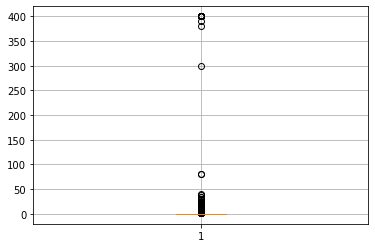

In [27]:
plt.boxplot(data['Price'])
plt.grid(linestyle = '-')
plt.show()

We see that there are datapoints that lie around 300 and above that can serve as outliers

#### ii. Do you expect apps on the play store to cost $200? Check out these cases

In [28]:
greater_than_200 = data[data['Price']>=200]

In [29]:
greater_than_200.shape

(15, 13)

There are about 15 records in the cleaned dataset that is priced 200 and above

#### iii. After dropping the useless records, make the suitable plot again to identify outliers

In [30]:
print(data[data['Installs']==0])

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [31]:
print(data[data['Type']==0])

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


After checking there seems to be no useless data hence the plot would be the same as before.

#### iv. Limit data to records with price < $30

In [32]:
data = data[data['Price']<30]

In [33]:
data.shape

(9338, 13)

#### b. Reviews column
#### i. Make suitable plot

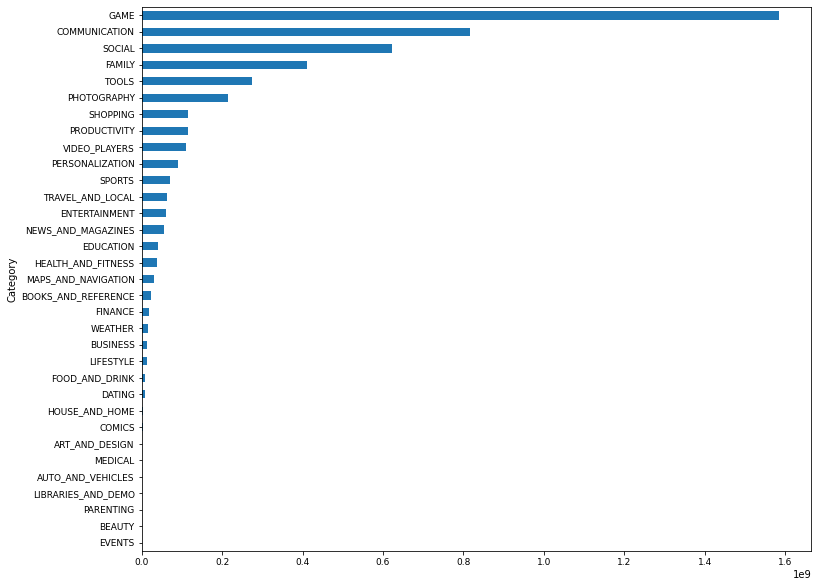

In [34]:
review_grouped=data.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(12,10))
review_grouped.plot(kind='barh', fontsize=9)
plt.show()

#### ii. Limit data to apps with < 1 Million reviews

In [35]:
extra = data[data['Reviews'] > 1000000]

In [36]:
data = data[data['Reviews'] < 1000000]

In [37]:
data.shape

(8634, 13)

In [38]:
#verification
9338-8634

704

## c. Installs

#### i. What is the 95th percentile of the installs?

In [39]:
ptile = data['Installs'].quantile(0.95)

print("95th percentile: ", ptile)

95th percentile:  10000000.0


#### ii. Drop records having a value more than the 95th percentile

In [40]:
data_new = data['Installs'].quantile() > ptile

In [41]:
data_new

False

There isnt any record holding Installs greater than the 95th percentile existing in the dataset

## Data analysis to answer business questions

#### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values

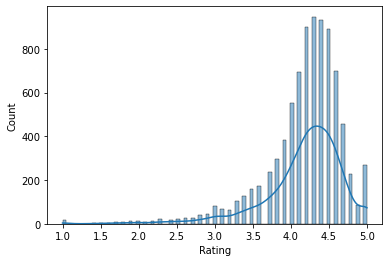

In [42]:
sns.histplot(data["Rating"],kde=True)
plt.show()

The distribution is more skewed towards lower values

#### a. How do you explain this?

In [43]:
print('Mean:', data['Rating'].mean())
print('Median:', data['Rating'].median())
print('Mode:', data['Rating'].mode())

Mean: 4.172492471623822
Median: 4.3
Mode: 0    4.3
dtype: float64


As mode is equal to the median which is greater than the mean, it indicates that this is left skewed. 

#### b. What is the implication of this on your analysis?

If the data is skewed, it will affect the performance of the machine. The tail region will act as the outliers. 
In order to use this data, we will have to treat the outliers by either normalizing or standarding it.

#### 6. What are the top Content Rating values?

In [44]:
top_CR = data['Content Rating'].value_counts()

In [45]:
print('Top Content Rating values:\n', top_CR) 

Top Content Rating values:
 Everyone           6943
Teen                933
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64


#### a. Are there any values with very few records?

Yes, Unrated and Adults only 18+ have only 1 and 3 respectively

#### b. If yes, drop those as they won’t help in the analysis

In [46]:
data.drop(data[data['Content Rating']=='Unrated'].index,inplace = True)

In [47]:
data.shape

(8633, 13)

In [48]:
data.drop(data[data['Content Rating']=='Adults only 18+'].index,inplace = True)

In [49]:
data.shape

(8630, 13)

In [50]:
data['Content Rating'].value_counts() 

Everyone        6943
Teen             933
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

## 7. Effect of size on rating

#### a. Make a joinplot to understand the effect of size on rating

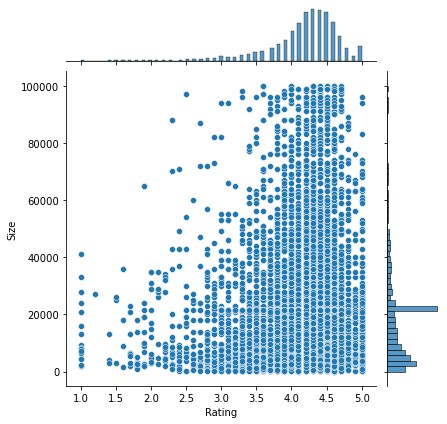

In [51]:
sns.jointplot(x ='Rating', y ='Size', data = data, kind = 'scatter')
plt.show()

#### b,c . Do you see any patterns?  How do you explain the pattern?

Yes, data points are concentrated between 4.0 and 4.5 rating and at around 40,000. This means that apps ranging from 0 to 40,000 have

## 8. Effect of price on rating

#### a. Make a jointplot (with regression line)

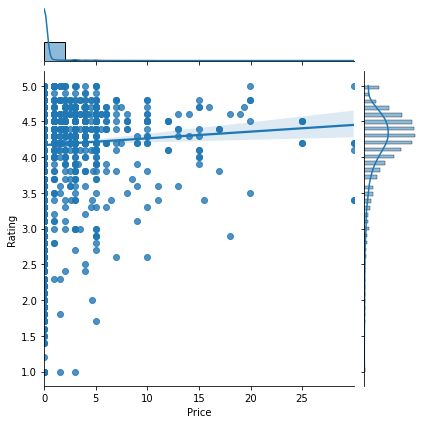

In [52]:
sns.jointplot(x='Price',y ='Rating', data = data, kind = 'reg')
plt.show()

#### b,c What pattern do you see? How do you explain the pattern?

As price increases, rating also increases. 
Rating is directly propotional to the price of the app. By increasing the price, the rating never fell below 4.

In [53]:
x = data[data['Price']>0] #loading them into new data set

In [54]:
x.shape

(621, 13)

<function matplotlib.pyplot.show(close=None, block=None)>

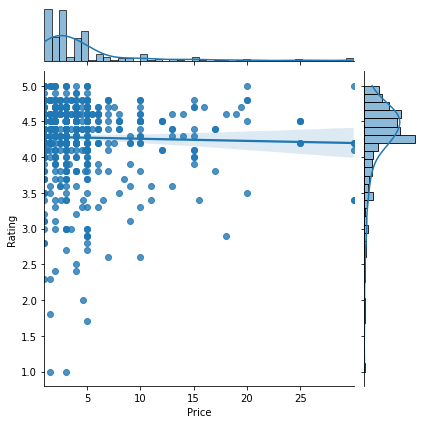

In [55]:
sns.jointplot(x='Price',y ='Rating', data = x, kind = 'reg')
plt.show

We see that as we removed apps with price = 0, the trend changed slightly. Now as we increase the price, the rating falls.

#### f. What is your overall inference on the effect of price on the rating

In [56]:
print('Without price = 0: ', x['Rating'].corr(x['Price']))
print('With price = 0: ', data['Rating'].corr(data['Price']))

Without price = 0:  -0.025974945737044144
With price = 0:  0.03079143733127246


We see that there is a negative correlation between ratings and price when apps with price = 0 are excluded and a positive corr when included. 
However, the ratings when prices are increased never fall below 4.

In [57]:
#data = x

## 9. Look at all the numeric interactions together –

#### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price

<function matplotlib.pyplot.show(close=None, block=None)>

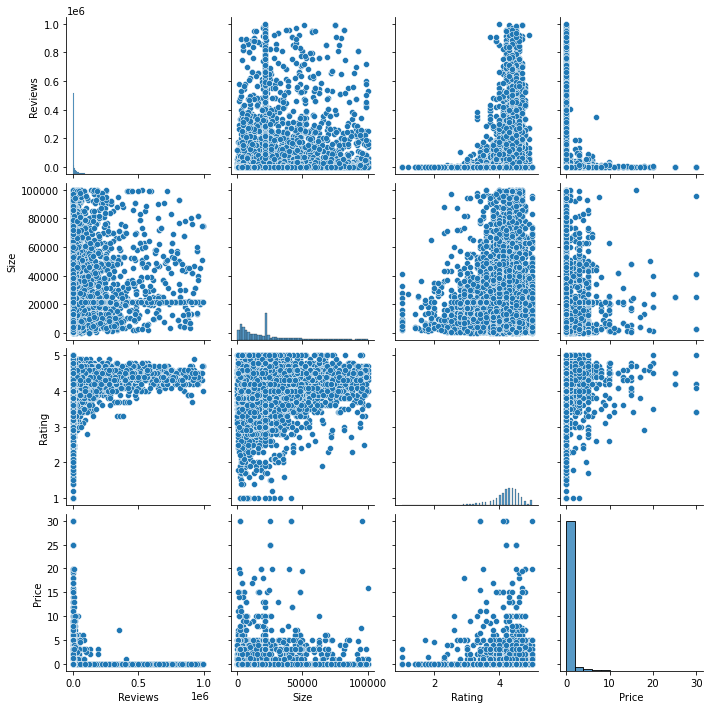

In [58]:
sns.pairplot(data, vars =['Reviews', 'Size', 'Rating', 'Price'])
plt.show

## 10. Rating vs. content rating

#### a. Make a bar plot displaying the rating for each content rating

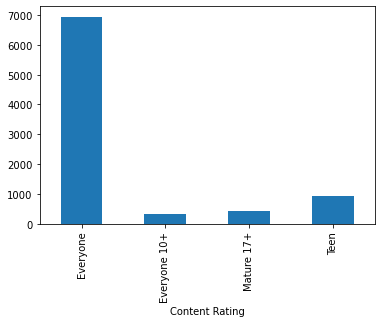

In [59]:
data.groupby(['Content Rating'])['Rating'].count().plot.bar()
plt.show()

b. Which metric would you use? Mean? Median? Some other quantile?

Median as we have outliers present in the data.

#### c. Choose the right metric and plot

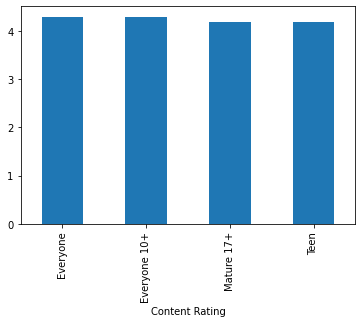

In [60]:
data.groupby(['Content Rating'])['Rating'].median().plot.bar()
plt.show()

## 11. Content rating vs. size vs. rating – 3 variables at a time

#### a. Create 5 buckets (20% records in each) based on Size

In [61]:
data["size"] = pd.cut(data['Size'], 5, labels=['Below 20k','20k-40k','40k-60k','60k-80k','80k-Max'])

In [62]:
data["size"].value_counts()

Below 20k    4575
20k-40k      2792
40k-60k       696
60k-80k       304
80k-Max       263
Name: size, dtype: int64

In [63]:
pd.pivot_table(data, values='Rating', index='size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
size,,,,
Below 20k,4.146001,4.247561,4.010582,4.182275
20k-40k,4.203324,4.166667,4.156291,4.173163
40k-60k,4.171457,4.265217,4.190476,4.242982
60k-80k,4.244221,4.280769,4.200000,4.273016
80k-Max,4.260127,4.304762,4.252632,4.269231


#### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination


In [64]:
q = pd.pivot_table(data, values='Rating', index='size', columns='Content Rating',
                   aggfunc=lambda x:np.quantile(x,0.2))

In [65]:
q

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
size,,,,
Below 20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.10,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-Max,4.04,4.10,4.0,4.0


## c. Make a heatmap of this

#### i. Annotated


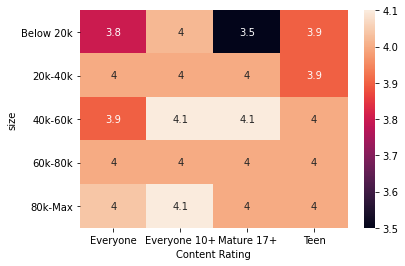

In [66]:
sns.heatmap(q, annot = True)
plt.show()

#### ii. Greens color map

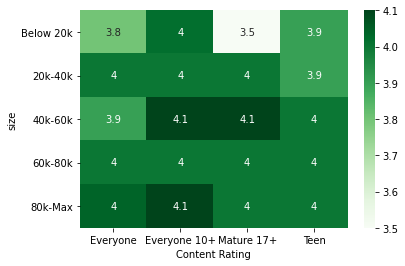

In [67]:
sns.heatmap(q, annot=True, cmap='Greens')
plt.show()

#### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Heavier apps are preffered over lighter apps in all categories. We see that apps of size 40k-60k and above 80k being rated the highest and anything below 20k being rated the least.

In [70]:
pwd

'C:\\Users\\Thomas'